# **OUTLIERS**


---

### üö® OUTLIERS ALERT! üö®

Outliers are those **unusual data points** that  
**stand far apart** from the rest of your dataset! üìä

üîπ They are **extreme values** ‚Äî either **way too high** or **shockingly low** compared to others.  
üîπ Outliers can **mislead your analysis**, **skew results**, or even **hide real trends**!

üìå **Remember:**  
> "An outlier doesn't follow the crowd ‚Äî it makes its own story!"

---

In [1]:
# LOADING DATASET:
import pandas as pd
DATA=pd.read_csv(r"C:\Users\Nagesh Agrawal\OneDrive\Desktop\EDA\DATA\DUPLICATES_REMOVED_DATA.csv")

# **DETECTION OF OUTLIERS FROM VISUALISATION**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
DATA

event_time        event_type  product_id  \
0        2019-12-01 00:00:00 UTC  remove_from_cart     5712790   
1        2019-12-01 00:00:00 UTC              view     5764655   
2        2019-12-01 00:00:02 UTC              cart        4958   
3        2019-12-01 00:00:05 UTC              view     5848413   
4        2019-12-01 00:00:07 UTC              view     5824148   
...                          ...               ...         ...   
3348707  2019-12-31 23:59:39 UTC              view     5683350   
3348708  2019-12-31 23:59:46 UTC              view     5888097   
3348709  2019-12-31 23:59:51 UTC              view       59975   
3348710  2019-12-31 23:59:52 UTC              view     5775982   
3348711  2019-12-31 23:59:57 UTC              view     5635090   

                 category_id      brand   price    user_id  \
0        1487580005268456287      f.o.x    6.27  576802932   
1        1487580005411062629        cnd   29.05  412120092   
2        1487580009471148064     runail    1.19  494077766   
3        1487580007675986893  freedecor    0.79  348405118   
4        1487580005511725929    missing    5.56  576005683   
...                      ...        ...     ...        ...   
3348707  1487580005671109489     masura    2.84  536812729   
3348708  1487580013388628160       shik  179.05  503658154   
3348709  1487580012096782476    missing    7.14  595414541   
3348710  1783999063314661546    missing   11.90  397780878   
3348711  1487580005754995573    missing    4.44  420652863   

                                 user_session  quantity  
0        51d85cb0-897f-48d2-918b-ad63965c12dc         1  
1        8adff31e-2051-4894-9758-224bfa8aec18         1  
2        c99a50e8-2fac-4c4d-89ec-41c05f114554         1  
3        722ffea5-73c0-4924-8e8f-371ff8031af4         1  
4        28172809-7e4a-45ce-bab0-5efa90117cd5         1  
...                                       ...       ...  
3348707  e4a2d47c-a956-4c46-8176-745f52ea664b         1  
3348708  2dde9867-9e71-4a64-880d-aa68b66aae6d         1  
3348709  4c6d80bb-5dd3-4fbb-b592-187b51db2753         1  
3348710  7e8a2b85-153a-44eb-a71f-b748fde14fcc         1  
3348711  546f6af3-a517-4752-a98b-80c4c5860711         1  

[3348712 rows x 9 columns]

## BOX PLOT

In [4]:
# sns.boxplot(data=DATA, x='category_id')

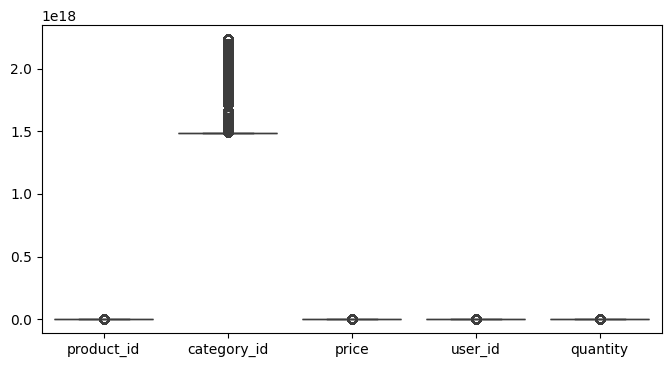

In [5]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=DATA)  
plt.show()


## HISTOGRAM

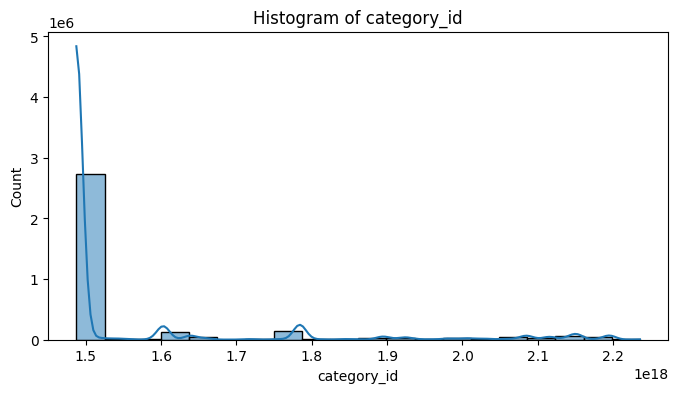

In [6]:
plt.figure(figsize=(8, 4))
sns.histplot(DATA['category_id'], bins=20, kde=True)  # Replace 'column_name'
plt.title('Histogram of category_id')
plt.show()

## SCATTER PLOT 

In [7]:
"""plt.figure(figsize=(8, 5))
sns.scatterplot(data=DATA)  # Replace both
plt.title('Scatterplot of column_x vs column_y')
plt.show()"""

"plt.figure(figsize=(8, 5))\nsns.scatterplot(data=DATA)  # Replace both\nplt.title('Scatterplot of column_x vs column_y')\nplt.show()"

# **STATISTICAL METHODS**

#### Z-SCORE CALCULATION:

In [8]:

def z_score_calculator(DATA):
    from scipy.stats import zscore
    for col in DATA.select_dtypes("number").columns:
        Z_SCORE = zscore(DATA[col])
        print(f"{col} z_score : {Z_SCORE}")
        
    

In [9]:


def z_score_calculator(df):
    from scipy.stats import zscore
    import pandas as pd
    numeric_cols = df.select_dtypes(include='number')
    z_scores = numeric_cols.apply(zscore)

    # Find rows where any column has a Z-score > 3 or < -3
    outlier_rows = (z_scores.abs() > 3).any(axis=1)

    # Extract those rows
    outliers = df[outlier_rows]
    return outliers



In [10]:
z_score_calculator(DATA)

event_time event_type  product_id          category_id  \
2        2019-12-01 00:00:02 UTC       cart        4958  1487580009471148064   
9        2019-12-01 00:00:34 UTC       cart        5335  1487580009605365797   
17       2019-12-01 00:00:50 UTC       view        3936  1487580005343953762   
36       2019-12-01 00:01:52 UTC       cart     5700046  1487580009286598681   
39       2019-12-01 00:02:16 UTC       view     5899850  2115334439910245200   
...                          ...        ...         ...                  ...   
3348697  2019-12-31 23:58:04 UTC       view     5529515  2151191070908613477   
3348703  2019-12-31 23:58:50 UTC       view     5528911  2151191070908613477   
3348706  2019-12-31 23:59:37 UTC       view     5834173  2151191070908613477   
3348708  2019-12-31 23:59:46 UTC       view     5888097  1487580013388628160   
3348709  2019-12-31 23:59:51 UTC       view       59975  1487580012096782476   

           brand   price    user_id                          user_session  \
2         runail    1.19  494077766  c99a50e8-2fac-4c4d-89ec-41c05f114554   
9         runail    0.40  494077766  c99a50e8-2fac-4c4d-89ec-41c05f114554   
17        entity   10.95  579969717  006dd2fb-ae1e-4461-985a-d4e70ca64543   
36        runail    0.40  576802932  51d85cb0-897f-48d2-918b-ad63965c12dc   
39       missing    4.46  538507783  177b9f5a-9ef3-4e11-b31e-6efd86a9bff2   
...          ...     ...        ...                                   ...   
3348697  missing    1.00  595411904  74ca1cd5-5381-4ffe-b00b-a258b390db77   
3348703  missing    3.97  595411904  74ca1cd5-5381-4ffe-b00b-a258b390db77   
3348706   runail    2.62  595411904  74ca1cd5-5381-4ffe-b00b-a258b390db77   
3348708     shik  179.05  503658154  2dde9867-9e71-4a64-880d-aa68b66aae6d   
3348709  missing    7.14  595414541  4c6d80bb-5dd3-4fbb-b592-187b51db2753   

         quantity  
2               1  
9               1  
17              1  
36              2  
39              1  
...           ...  
3348697         1  
3348703         1  
3348706         1  
3348708         1  
3348709         1  

[634875 rows x 9 columns]

#### UPPER/LOWER EXTREME CALCULATION:

In [11]:
import pandas as pd

def DATA_EXTREMES(DATA):
    extremes = []
    for col in DATA.select_dtypes('number').columns:
        Q3 = DATA[col].quantile(0.75)
        Q1 = DATA[col].quantile(0.25)
        IQR = Q3 - Q1
        upper_extreme = Q3 + 1.5 * IQR
        lower_extreme = Q1 - 1.5 * IQR
        extremes.append({
            'Column': col,
            'Upper_Extreme': upper_extreme,
            'Lower_Extreme': lower_extreme
        })
    return pd.DataFrame(extremes)


In [12]:
EXTREME_VALUES=pd.DataFrame(DATA_EXTREMES(DATA))
EXTREME_VALUES

Column  Upper_Extreme  Lower_Extreme
0   product_id   6.059438e+06   5.526230e+06
1  category_id   1.487580e+18   1.487580e+18
2        price   1.476000e+01  -5.560000e+00
3      user_id   7.263984e+08   3.441720e+08
4     quantity   1.000000e+00   1.000000e+00

In [13]:
DATA[DATA["category_id"]>1.4875800245035325e+18]

event_time        event_type  product_id  \
15       2019-12-01 00:00:46 UTC              view     5798929   
39       2019-12-01 00:02:16 UTC              view     5899850   
40       2019-12-01 00:02:18 UTC  remove_from_cart     5772301   
41       2019-12-01 00:02:19 UTC  remove_from_cart     5772301   
42       2019-12-01 00:02:25 UTC              view     5772301   
...                          ...               ...         ...   
3348697  2019-12-31 23:58:04 UTC              view     5529515   
3348698  2019-12-31 23:58:13 UTC              view     5869134   
3348703  2019-12-31 23:58:50 UTC              view     5528911   
3348706  2019-12-31 23:59:37 UTC              view     5834173   
3348710  2019-12-31 23:59:52 UTC              view     5775982   

                 category_id       brand  price    user_id  \
15       1783999068909863670      zinger   6.19  579966747   
39       2115334439910245200     missing   4.46  538507783   
40       1602943681873052386     grattol   4.76  492321842   
41       1602943681873052386     grattol   4.76  492321842   
42       1602943681873052386     grattol   4.76  492321842   
...                      ...         ...    ...        ...   
3348697  2151191070908613477     missing   1.00  595411904   
3348698  1783999064136745198  cosmoprofi   6.35  397780878   
3348703  2151191070908613477     missing   3.97  595411904   
3348706  2151191070908613477      runail   2.62  595411904   
3348710  1783999063314661546     missing  11.90  397780878   

                                 user_session  quantity  
15       1512be50-d0fd-4a92-bcd8-3ea3943f2a3b         1  
39       177b9f5a-9ef3-4e11-b31e-6efd86a9bff2         1  
40       d1d89629-a5f8-4aab-b42e-e8c30756396f         1  
41       d1d89629-a5f8-4aab-b42e-e8c30756396f         1  
42       d1d89629-a5f8-4aab-b42e-e8c30756396f         1  
...                                       ...       ...  
3348697  74ca1cd5-5381-4ffe-b00b-a258b390db77         1  
3348698  7e8a2b85-153a-44eb-a71f-b748fde14fcc         1  
3348703  74ca1cd5-5381-4ffe-b00b-a258b390db77         1  
3348706  74ca1cd5-5381-4ffe-b00b-a258b390db77         1  
3348710  7e8a2b85-153a-44eb-a71f-b748fde14fcc         1  

[638004 rows x 9 columns]

In [14]:
DATA[DATA["category_id"]<875799953782886e+18]

event_time        event_type  product_id  \
0        2019-12-01 00:00:00 UTC  remove_from_cart     5712790   
1        2019-12-01 00:00:00 UTC              view     5764655   
2        2019-12-01 00:00:02 UTC              cart        4958   
3        2019-12-01 00:00:05 UTC              view     5848413   
4        2019-12-01 00:00:07 UTC              view     5824148   
...                          ...               ...         ...   
3348707  2019-12-31 23:59:39 UTC              view     5683350   
3348708  2019-12-31 23:59:46 UTC              view     5888097   
3348709  2019-12-31 23:59:51 UTC              view       59975   
3348710  2019-12-31 23:59:52 UTC              view     5775982   
3348711  2019-12-31 23:59:57 UTC              view     5635090   

                 category_id      brand   price    user_id  \
0        1487580005268456287      f.o.x    6.27  576802932   
1        1487580005411062629        cnd   29.05  412120092   
2        1487580009471148064     runail    1.19  494077766   
3        1487580007675986893  freedecor    0.79  348405118   
4        1487580005511725929    missing    5.56  576005683   
...                      ...        ...     ...        ...   
3348707  1487580005671109489     masura    2.84  536812729   
3348708  1487580013388628160       shik  179.05  503658154   
3348709  1487580012096782476    missing    7.14  595414541   
3348710  1783999063314661546    missing   11.90  397780878   
3348711  1487580005754995573    missing    4.44  420652863   

                                 user_session  quantity  
0        51d85cb0-897f-48d2-918b-ad63965c12dc         1  
1        8adff31e-2051-4894-9758-224bfa8aec18         1  
2        c99a50e8-2fac-4c4d-89ec-41c05f114554         1  
3        722ffea5-73c0-4924-8e8f-371ff8031af4         1  
4        28172809-7e4a-45ce-bab0-5efa90117cd5         1  
...                                       ...       ...  
3348707  e4a2d47c-a956-4c46-8176-745f52ea664b         1  
3348708  2dde9867-9e71-4a64-880d-aa68b66aae6d         1  
3348709  4c6d80bb-5dd3-4fbb-b592-187b51db2753         1  
3348710  7e8a2b85-153a-44eb-a71f-b748fde14fcc         1  
3348711  546f6af3-a517-4752-a98b-80c4c5860711         1  

[3348712 rows x 9 columns]

In [15]:
# lower extreme: product_id
DATA[DATA["product_id"] < 5526230.0] # LESS THAN LOWER EXTREME VALUE {5526230.0}

event_time event_type  product_id          category_id  \
2        2019-12-01 00:00:02 UTC       cart        4958  1487580009471148064   
9        2019-12-01 00:00:34 UTC       cart        5335  1487580009605365797   
17       2019-12-01 00:00:50 UTC       view        3936  1487580005343953762   
52       2019-12-01 00:02:46 UTC       view       72433  1487580011996119176   
83       2019-12-01 00:03:47 UTC       view       72433  1487580011996119176   
...                          ...        ...         ...                  ...   
3348569  2019-12-31 23:45:42 UTC       view       44151  1487580006317032337   
3348646  2019-12-31 23:54:06 UTC       view       44140  1487580013615120588   
3348652  2019-12-31 23:54:44 UTC       view        5304  1487580009471148064   
3348682  2019-12-31 23:57:15 UTC   purchase        5463  1487580009387261981   
3348709  2019-12-31 23:59:51 UTC       view       59975  1487580012096782476   

            brand  price    user_id                          user_session  \
2          runail   1.19  494077766  c99a50e8-2fac-4c4d-89ec-41c05f114554   
9          runail   0.40  494077766  c99a50e8-2fac-4c4d-89ec-41c05f114554   
17         entity  10.95  579969717  006dd2fb-ae1e-4461-985a-d4e70ca64543   
52       skinlite   4.75  537197314  cf789c07-983d-4a56-a093-fa21b22453e0   
83       skinlite   4.75  537197314  5ffe1721-5efc-498f-817a-1678b27888e8   
...           ...    ...        ...                                   ...   
3348569   missing   9.52  595412617  46a5010f-bd69-4fbe-a00d-bb17aa7b46f3   
3348646   missing   0.71  567323227  2dc166c7-ba42-4df8-9733-65c7a2e90f9e   
3348652    runail   0.32  584900297  191a4251-e99c-4dc9-87ee-295107387d58   
3348682  ingarden   4.92  231690364  63fc9878-efe2-41e3-92b1-9b2deb943bbb   
3348709   missing   7.14  595414541  4c6d80bb-5dd3-4fbb-b592-187b51db2753   

         quantity  
2               1  
9               1  
17              1  
52              1  
83              1  
...           ...  
3348569         1  
3348646         1  
3348652         1  
3348682         1  
3348709         1  

[189746 rows x 9 columns]

In [16]:
DATA[DATA["product_id"] > 6059438.0] # GREATER THAN UPPER EXTREME VALUE[6059438.0].

Empty DataFrame
Columns: [event_time, event_type, product_id, category_id, brand, price, user_id, user_session, quantity]
Index: []

In [17]:
# DISPLAY OUTLIER IN EACH COLUMN :
outliers = DATA[(DATA["product_id"] < 5526230.0) | (DATA["product_id"] > 6059438.0 )]
outliers

event_time event_type  product_id          category_id  \
2        2019-12-01 00:00:02 UTC       cart        4958  1487580009471148064   
9        2019-12-01 00:00:34 UTC       cart        5335  1487580009605365797   
17       2019-12-01 00:00:50 UTC       view        3936  1487580005343953762   
52       2019-12-01 00:02:46 UTC       view       72433  1487580011996119176   
83       2019-12-01 00:03:47 UTC       view       72433  1487580011996119176   
...                          ...        ...         ...                  ...   
3348569  2019-12-31 23:45:42 UTC       view       44151  1487580006317032337   
3348646  2019-12-31 23:54:06 UTC       view       44140  1487580013615120588   
3348652  2019-12-31 23:54:44 UTC       view        5304  1487580009471148064   
3348682  2019-12-31 23:57:15 UTC   purchase        5463  1487580009387261981   
3348709  2019-12-31 23:59:51 UTC       view       59975  1487580012096782476   

            brand  price    user_id                          user_session  \
2          runail   1.19  494077766  c99a50e8-2fac-4c4d-89ec-41c05f114554   
9          runail   0.40  494077766  c99a50e8-2fac-4c4d-89ec-41c05f114554   
17         entity  10.95  579969717  006dd2fb-ae1e-4461-985a-d4e70ca64543   
52       skinlite   4.75  537197314  cf789c07-983d-4a56-a093-fa21b22453e0   
83       skinlite   4.75  537197314  5ffe1721-5efc-498f-817a-1678b27888e8   
...           ...    ...        ...                                   ...   
3348569   missing   9.52  595412617  46a5010f-bd69-4fbe-a00d-bb17aa7b46f3   
3348646   missing   0.71  567323227  2dc166c7-ba42-4df8-9733-65c7a2e90f9e   
3348652    runail   0.32  584900297  191a4251-e99c-4dc9-87ee-295107387d58   
3348682  ingarden   4.92  231690364  63fc9878-efe2-41e3-92b1-9b2deb943bbb   
3348709   missing   7.14  595414541  4c6d80bb-5dd3-4fbb-b592-187b51db2753   

         quantity  
2               1  
9               1  
17              1  
52              1  
83              1  
...           ...  
3348569         1  
3348646         1  
3348652         1  
3348682         1  
3348709         1  

[189746 rows x 9 columns]

# **MACHINE LEARNING ALGORITHMS**

### ISOLATION FOREST:


---

üéØ **ISOLATION FOREST: Outlier Detection Made Simple!**

üå≤ **Isolation**  
‚Üí Builds **many random trees** that **split data** in different directions.  
‚Üí Each tree tries to **"isolate"** a data point by cutting through the data space.

üßÆ **Scoring**  
‚Üí Measures **how quickly** a data point gets isolated.  
‚Üí **Point that isolates quickly = likely an anomaly!**

üö® **Result**  
‚Üí Points with **shorter isolation paths** are flagged as **anomalies or outliers**.  

üìä **Works on Multidimensional Data!**  
‚Üí Detects **outliers** in complex datasets with **multiple features**.

‚ùó **Anomaly = A data point that behaves *differently***  
‚Üí It's the **odd one out** among the rest!

üîç **Unsupervised Technique**  
‚Üí No labels needed!  
‚Üí **Not used** for building predictive models ‚Äî it‚Äôs purely for **detection**.

---




---

üéØ **WORKING OF ISOLATION FOREST**

üå≤ **Step 1: Build Random Trees**  
üëâ Randomly pick a feature  
üëâ Randomly select a split value  
üëâ Repeat to create **many isolation trees**

üî™ **Step 2: Isolate the Points**  
üëâ Each tree **splits the data**  
üëâ A data point gets **isolated** as we go down the tree

‚è±Ô∏è **Step 3: Measure Path Length**  
üëâ Count steps from root to isolated point  
üëâ **Points that isolate quickly = potential outliers**

üìä **Step 4: Calculate Anomaly Score**  
üëâ Shorter average path ‚Üí **Higher anomaly score**  
üëâ Score close to **1 = anomaly**  
üëâ Score close to **0 = normal**

üö® **Final Step: Flag Anomalies**  
üëâ Use the score to **identify unusual data**

üß† **Unsupervised & Powerful**  
üí° No need for labeled data!

---


In [18]:
from sklearn.ensemble import IsolationForest
ISO=IsolationForest(contamination=0.1,random_state=2)
DATA["ANOMALY_SCORE"]=ISO.fit_predict(DATA.select_dtypes("number"))

In [19]:
DATA # ON ANOMALY SCORE WHAT WE CAN SAY WHICH EVER DATA POINT ACT AS ANOMALY WILL HAVE ANOMALY SCORE AS -1....

event_time        event_type  product_id  \
0        2019-12-01 00:00:00 UTC  remove_from_cart     5712790   
1        2019-12-01 00:00:00 UTC              view     5764655   
2        2019-12-01 00:00:02 UTC              cart        4958   
3        2019-12-01 00:00:05 UTC              view     5848413   
4        2019-12-01 00:00:07 UTC              view     5824148   
...                          ...               ...         ...   
3348707  2019-12-31 23:59:39 UTC              view     5683350   
3348708  2019-12-31 23:59:46 UTC              view     5888097   
3348709  2019-12-31 23:59:51 UTC              view       59975   
3348710  2019-12-31 23:59:52 UTC              view     5775982   
3348711  2019-12-31 23:59:57 UTC              view     5635090   

                 category_id      brand   price    user_id  \
0        1487580005268456287      f.o.x    6.27  576802932   
1        1487580005411062629        cnd   29.05  412120092   
2        1487580009471148064     runail    1.19  494077766   
3        1487580007675986893  freedecor    0.79  348405118   
4        1487580005511725929    missing    5.56  576005683   
...                      ...        ...     ...        ...   
3348707  1487580005671109489     masura    2.84  536812729   
3348708  1487580013388628160       shik  179.05  503658154   
3348709  1487580012096782476    missing    7.14  595414541   
3348710  1783999063314661546    missing   11.90  397780878   
3348711  1487580005754995573    missing    4.44  420652863   

                                 user_session  quantity  ANOMALY_SCORE  
0        51d85cb0-897f-48d2-918b-ad63965c12dc         1              1  
1        8adff31e-2051-4894-9758-224bfa8aec18         1              1  
2        c99a50e8-2fac-4c4d-89ec-41c05f114554         1             -1  
3        722ffea5-73c0-4924-8e8f-371ff8031af4         1              1  
4        28172809-7e4a-45ce-bab0-5efa90117cd5         1              1  
...                                       ...       ...            ...  
3348707  e4a2d47c-a956-4c46-8176-745f52ea664b         1              1  
3348708  2dde9867-9e71-4a64-880d-aa68b66aae6d         1             -1  
3348709  4c6d80bb-5dd3-4fbb-b592-187b51db2753         1             -1  
3348710  7e8a2b85-153a-44eb-a71f-b748fde14fcc         1              1  
3348711  546f6af3-a517-4752-a98b-80c4c5860711         1              1  

[3348712 rows x 10 columns]

In [20]:
# OUTLIERS :
DATA[DATA["ANOMALY_SCORE"]==-1]

event_time event_type  product_id          category_id  \
2        2019-12-01 00:00:02 UTC       cart        4958  1487580009471148064   
9        2019-12-01 00:00:34 UTC       cart        5335  1487580009605365797   
17       2019-12-01 00:00:50 UTC       view        3936  1487580005343953762   
46       2019-12-01 00:02:36 UTC       view     5590822  1487580006300255120   
51       2019-12-01 00:02:42 UTC       view     5746846  2193074740686488401   
...                          ...        ...         ...                  ...   
3348690  2019-12-31 23:57:32 UTC       view     5528911  2151191070908613477   
3348697  2019-12-31 23:58:04 UTC       view     5529515  2151191070908613477   
3348703  2019-12-31 23:58:50 UTC       view     5528911  2151191070908613477   
3348708  2019-12-31 23:59:46 UTC       view     5888097  1487580013388628160   
3348709  2019-12-31 23:59:51 UTC       view       59975  1487580012096782476   

           brand   price    user_id                          user_session  \
2         runail    1.19  494077766  c99a50e8-2fac-4c4d-89ec-41c05f114554   
9         runail    0.40  494077766  c99a50e8-2fac-4c4d-89ec-41c05f114554   
17        entity   10.95  579969717  006dd2fb-ae1e-4461-985a-d4e70ca64543   
46        strong  194.44  509449396  35baf72e-d65a-422b-8d46-d62a52985877   
51         irisk   52.70  579970581  0b92a801-25d8-4da5-b514-fda26db3faae   
...          ...     ...        ...                                   ...   
3348690  missing    3.97  595411904  74ca1cd5-5381-4ffe-b00b-a258b390db77   
3348697  missing    1.00  595411904  74ca1cd5-5381-4ffe-b00b-a258b390db77   
3348703  missing    3.97  595411904  74ca1cd5-5381-4ffe-b00b-a258b390db77   
3348708     shik  179.05  503658154  2dde9867-9e71-4a64-880d-aa68b66aae6d   
3348709  missing    7.14  595414541  4c6d80bb-5dd3-4fbb-b592-187b51db2753   

         quantity  ANOMALY_SCORE  
2               1             -1  
9               1             -1  
17              1             -1  
46              1             -1  
51              1             -1  
...           ...            ...  
3348690         1             -1  
3348697         1             -1  
3348703         1             -1  
3348708         1             -1  
3348709         1             -1  

[334867 rows x 10 columns]

## DBSCAN [ DENSITY BASED SPATIAL CLUSTERING OF APPLICATION WITH NOISE ]

---

### üåü **DBSCAN: Outlier Detection Made Simple!** üåü

DBSCAN is **effective** for finding outliers in **spatial data** or data that form **clusters**. Points that **do not belong to any cluster** are **considered as outliers**‚Äîit‚Äôs like identifying the lone wolves in a herd! üê∫üí•

---


In [21]:
! pip install hdbscan


You should consider upgrading via the 'C:\Users\Nagesh Agrawal\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [22]:
! pip install hdbscan

You should consider upgrading via the 'C:\Users\Nagesh Agrawal\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [23]:
import hdbscan
from sklearn.preprocessing import StandardScaler

sampled_data = DATA.sample(n=10000, random_state=42)

numeric_cols = sampled_data.select_dtypes(include=["float64", "int64"])
standardized_data = StandardScaler().fit_transform(numeric_cols)

clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
sampled_data["db_scaned"] = clusterer.fit_predict(standardized_data)


In [24]:
sampled_data

event_time event_type  product_id          category_id  \
307091   2019-12-03 12:35:54 UTC       view     5710115  1487580012994363565   
2769365  2019-12-24 09:43:55 UTC       cart     5752494  1487580005511725929   
1906790  2019-12-16 12:07:59 UTC       view     5873513  1487580013279576251   
541134   2019-12-05 09:34:16 UTC       view     5854491  1487580005268456287   
800760   2019-12-07 15:22:24 UTC       view     5809910  1602943681873052386   
...                          ...        ...         ...                  ...   
1679194  2019-12-14 13:43:08 UTC       view     5686080  1487580008145748965   
141995   2019-12-02 08:02:28 UTC       view     5823778  1487580013749338323   
2942393  2019-12-25 21:54:44 UTC       cart     5753480  1487580013069861041   
1257201  2019-12-11 04:35:11 UTC       cart     5813416  1897124478404526487   
1784219  2019-12-15 13:23:40 UTC       view     5881433  1487580013506068678   

           brand  price    user_id                          user_session  \
307091   italwax  20.14  557685968  764da041-68fc-48e5-b649-ffa56ebd68bd   
2769365  missing   4.27  437208817  e3c3a5e9-609d-4e52-82e6-aa317dfd6800   
1906790  missing  31.59  587773138  a5a82931-0e03-40c7-80e1-bc060770cf03   
541134   missing   8.65  571007640  c3203d51-85a6-4a8f-9a52-f5b60912dac7   
800760   grattol   5.24  472536297  d1cda616-04eb-4b24-b9a5-b55ea09c24e3   
...          ...    ...        ...                                   ...   
1679194  missing   0.51  586823046  4d5eadd0-ecd1-48c8-9cdc-b7835a670400   
141995     estel   2.38  580710329  92b61549-476b-4dee-981f-6a5e0d7acfa7   
2942393  italwax   2.68  568557356  57fbcb30-c41e-475d-a8ba-c876ca950b37   
1257201  missing   5.56  585107125  80581cbe-71d1-4717-8c4d-138f9fe95db1   
1784219   lovely  11.27  587296620  d8cc735c-e732-4ce8-9aff-d82d2222db99   

         quantity  ANOMALY_SCORE  db_scaned  
307091          1              1         -1  
2769365         1              1         -1  
1906790         1              1         -1  
541134          1              1         -1  
800760          1              1         24  
...           ...            ...        ...  
1679194         1              1         56  
141995          1              1         56  
2942393         1              1         56  
1257201         1              1         16  
1784219         1              1         -1  

[10000 rows x 11 columns]


---

### üö´ **Why NOT DBSCAN/HDBSCAN on Big Data?**

> üß† **DBSCAN & HDBSCAN = Smart but Heavy!**

* üê¢ **Slow** ‚Äî Complexity is **O(n¬≤)**, so they **choke on millions of rows**
* üßä **Memory-Hungry** ‚Äî They build **distance matrices** ‚Üí RAM explodes!
* üß≠ **No Free Lunch** ‚Äî Accuracy is great, but **doesn't scale well**
* ‚ö†Ô∏è **Not Parallel by Default** ‚Äî CPU-only, and doesn't batch easily

‚úÖ **Great for small to mid-sized data**, but **switch to Isolation Forest, MiniBatchKMeans**, or **GPU-based clustering** for big data!

---



### üîµ **Elliptic Envelope**
‚ú® *Outlier Detection with an Elliptical Boundary!* ‚ú®

üìå **What it is:**
A method to detect **outliers** assuming the data follows a **Gaussian (normal) distribution**.

üî∑ **How it works:**
It fits an **ellipse** around the **central data points** and flags anything **outside** the ellipse as an **outlier**.

üìä **Best for:**

* **Multivariate normal data**
* When you want a **geometric view** of inliers vs outliers

‚öôÔ∏è **Behind the scenes:**
Uses **Mahalanobis distance** to decide how far a point is from the center of the ellipse.

üí° **Use it in Python:**



‚úÖ **+ Simple**
‚úÖ **+ Fast**
‚ùå **- Not for non-Gaussian data**

Would you like a diagram to visualize the ellipse and outliers?


In [25]:
from sklearn.covariance import EllipticEnvelope
EE=EllipticEnvelope(contamination=0.1)
sampled_data["ELLIPTIC_ENVOLOPE"]=EE.fit_predict(sampled_data.select_dtypes("number"))
# -1 = outlier, 1 = inlier



c:\Users\Nagesh Agrawal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (105.775527138558246 > 105.631902882317576). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
c:\Users\Nagesh Agrawal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (105.775527138558246 > 105.631902882317576). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
c:\Users\Nagesh Agrawal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (105.775527138558246 > 105.631902882

In [26]:
sampled_data

event_time event_type  product_id          category_id  \
307091   2019-12-03 12:35:54 UTC       view     5710115  1487580012994363565   
2769365  2019-12-24 09:43:55 UTC       cart     5752494  1487580005511725929   
1906790  2019-12-16 12:07:59 UTC       view     5873513  1487580013279576251   
541134   2019-12-05 09:34:16 UTC       view     5854491  1487580005268456287   
800760   2019-12-07 15:22:24 UTC       view     5809910  1602943681873052386   
...                          ...        ...         ...                  ...   
1679194  2019-12-14 13:43:08 UTC       view     5686080  1487580008145748965   
141995   2019-12-02 08:02:28 UTC       view     5823778  1487580013749338323   
2942393  2019-12-25 21:54:44 UTC       cart     5753480  1487580013069861041   
1257201  2019-12-11 04:35:11 UTC       cart     5813416  1897124478404526487   
1784219  2019-12-15 13:23:40 UTC       view     5881433  1487580013506068678   

           brand  price    user_id                          user_session  \
307091   italwax  20.14  557685968  764da041-68fc-48e5-b649-ffa56ebd68bd   
2769365  missing   4.27  437208817  e3c3a5e9-609d-4e52-82e6-aa317dfd6800   
1906790  missing  31.59  587773138  a5a82931-0e03-40c7-80e1-bc060770cf03   
541134   missing   8.65  571007640  c3203d51-85a6-4a8f-9a52-f5b60912dac7   
800760   grattol   5.24  472536297  d1cda616-04eb-4b24-b9a5-b55ea09c24e3   
...          ...    ...        ...                                   ...   
1679194  missing   0.51  586823046  4d5eadd0-ecd1-48c8-9cdc-b7835a670400   
141995     estel   2.38  580710329  92b61549-476b-4dee-981f-6a5e0d7acfa7   
2942393  italwax   2.68  568557356  57fbcb30-c41e-475d-a8ba-c876ca950b37   
1257201  missing   5.56  585107125  80581cbe-71d1-4717-8c4d-138f9fe95db1   
1784219   lovely  11.27  587296620  d8cc735c-e732-4ce8-9aff-d82d2222db99   

         quantity  ANOMALY_SCORE  db_scaned  ELLIPTIC_ENVOLOPE  
307091          1              1         -1                  1  
2769365         1              1         -1                  1  
1906790         1              1         -1                  1  
541134          1              1         -1                  1  
800760          1              1         24                  1  
...           ...            ...        ...                ...  
1679194         1              1         56                  1  
141995          1              1         56                  1  
2942393         1              1         56                  1  
1257201         1              1         16                 -1  
1784219         1              1         -1                  1  

[10000 rows x 12 columns]

## AUTOENCODER


---

üéØ **Autoencoder for Anomaly Detection** üö®

üîç **Autoencoders** use **neural networks** to **reconstruct input data**.

üìâ **Data points with high reconstruction error** = **Anomalies / Outliers**!

üß† Perfect for detecting irregularities in **complex or high-dimensional datasets**.

‚ú® *Let the neural net learn what's "normal"... so it can spot what's not!* ‚ú®

---



In [27]:
#! pip install tensorflow

In [28]:
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sampled_data.select_dtypes("number"))

# Build autoencoder
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation="relu")(input_layer)
decoded = Dense(input_dim, activation="linear")(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, verbose=0)

# Reconstruction error
reconstructions = autoencoder.predict(X_scaled)
mse = np.mean(np.square(X_scaled - reconstructions), axis=1)

# Flag outliers
threshold = np.percentile(mse, 95)
outliers = (mse > threshold).astype(int)  # 1 = outlier
outliers


313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 481us/step


array([0, 0, 0, ..., 0, 0, 0])

| **Method**            | **Best When...**                                                                 | **Strengths**                                                                 | **Limitations**                                                        | **Suitable for Your Case?**             |
|-----------------------|----------------------------------------------------------------------------------|-------------------------------------------------------------------------------|------------------------------------------------------------------------|-----------------------------------------|
| **Z-Score**           | Data is **normally distributed**                                                | ‚úÖ Easy to implement<br>‚úÖ Fast for large data                                 | ‚ùå Assumes normality<br>‚ùå Sensitive to extreme values                  | ‚ö†Ô∏è Only if your data is normal          |
| **IQR Method**        | Data is **not normal or skewed**                                                | ‚úÖ Fast and interpretable<br>‚úÖ No distribution assumption                     | ‚ùå Treats each column independently (univariate only)                  | ‚úÖ Good for initial univariate check     |
| **Isolation Forest**  | Large datasets with **non-linear, multivariate outliers**                       | ‚úÖ Works on large data<br>‚úÖ Detects multivariate outliers                    | ‚ùå Less interpretable<br>‚ö†Ô∏è Needs tuning (contamination rate)         | ‚úÖ Best choice for your large dataset   |
| **DBSCAN**            | Data has **dense clusters + noise**, and you're looking for **spatial outliers** | ‚úÖ Detects arbitrary shapes<br>‚úÖ No need to specify number of clusters        | ‚ùå Slow for large data<br>‚ùå Needs parameter tuning (eps, min_samples) | ‚ö†Ô∏è Use only if data is spatially clustered |
| **Autoencoder**       | Data is **high-dimensional, non-tabular** (e.g., time-series, images)            | ‚úÖ Powerful for complex, non-linear outliers                                  | ‚ùå Requires deep learning setup<br>‚ùå Hard to interpret                 | ‚ùå Not suitable for tabular numeric data |

---

# üåü **OUTLIER TREATMENT**



---

### üö´ 1. **REMOVAL**

üßπ **Delete** the outlier rows

üìå When? Obvious mistakes or irrelevant data

‚úÖ **Clean & simple!**

> ‚ùó **But what if genuine outliers are many?**

* ‚ùå **Avoid blind removal** ‚Äî you might lose key patterns

* ‚úÖ Try alternatives:

  * üîÑ **Log Transformation**

  * üå≥ **Robust models** like Decision Trees, XGBoost

  * ‚úÇÔ∏è **Model them separately** if they represent a distinct group
  
    üí° *If genuine outliers are frequent, they‚Äôre not really outliers ‚Äî they‚Äôre part of the data!*

---

### üéØ 2. **CAPPING (WINSORIZATION)**

üìè **Limit** extreme values to a set range

üí° Use 5th & 95th percentiles

‚úÖ **Keeps data, reduces impact!**

‚ö†Ô∏è **Changes actual values** ‚Äî may distort real insights

ü§î Use only if the outliers are **not critical** for pattern detection

---

### üîÑ 3. **TRANSFORMATION**

üîß **Shrink** the effect of outliers

üìä Use **Log**, **‚àö**, or **Z-score**

‚úÖ **Smooth and normalize!**

üéØ Best for **skewed data**

‚ö†Ô∏è Log works only for **positive values**

---

### üß© 4. **IMPUTATION**

üîÅ **Replace** outliers with:

üëâ **Mean**, **Median**, or **Mode**

‚úÖ **Balanced and stable!**

üö´ **Not ideal for outliers** ‚Äî may **distort distributions**

‚ö†Ô∏è Can even **create duplicate records**

‚úîÔ∏è Better suited for **missing values**, not extreme ones

---

### ‚ú® **Tip**: Always visualize first with a boxplot or scatter plot before treating!

üìà Let your data shine‚Äî**without the drama!** üí•

---



<Axes: >

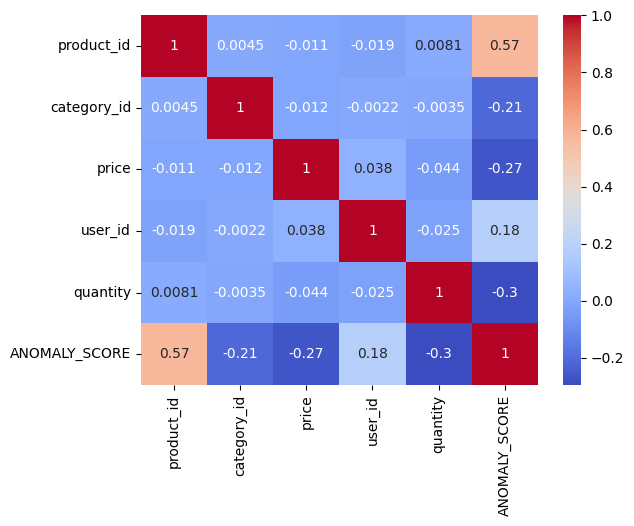

In [29]:
import seaborn as sns
# Plot heatmap with annotation
sns.heatmap(DATA.select_dtypes("number").corr(), annot=True, cmap='coolwarm')

**REMOVAL OF OUTLIERS**

In [30]:
DATA # ALONG WITH ANOMALY SCORE FROM ISOLATION FOREST ALGO:

event_time        event_type  product_id  \
0        2019-12-01 00:00:00 UTC  remove_from_cart     5712790   
1        2019-12-01 00:00:00 UTC              view     5764655   
2        2019-12-01 00:00:02 UTC              cart        4958   
3        2019-12-01 00:00:05 UTC              view     5848413   
4        2019-12-01 00:00:07 UTC              view     5824148   
...                          ...               ...         ...   
3348707  2019-12-31 23:59:39 UTC              view     5683350   
3348708  2019-12-31 23:59:46 UTC              view     5888097   
3348709  2019-12-31 23:59:51 UTC              view       59975   
3348710  2019-12-31 23:59:52 UTC              view     5775982   
3348711  2019-12-31 23:59:57 UTC              view     5635090   

                 category_id      brand   price    user_id  \
0        1487580005268456287      f.o.x    6.27  576802932   
1        1487580005411062629        cnd   29.05  412120092   
2        1487580009471148064     runail    1.19  494077766   
3        1487580007675986893  freedecor    0.79  348405118   
4        1487580005511725929    missing    5.56  576005683   
...                      ...        ...     ...        ...   
3348707  1487580005671109489     masura    2.84  536812729   
3348708  1487580013388628160       shik  179.05  503658154   
3348709  1487580012096782476    missing    7.14  595414541   
3348710  1783999063314661546    missing   11.90  397780878   
3348711  1487580005754995573    missing    4.44  420652863   

                                 user_session  quantity  ANOMALY_SCORE  
0        51d85cb0-897f-48d2-918b-ad63965c12dc         1              1  
1        8adff31e-2051-4894-9758-224bfa8aec18         1              1  
2        c99a50e8-2fac-4c4d-89ec-41c05f114554         1             -1  
3        722ffea5-73c0-4924-8e8f-371ff8031af4         1              1  
4        28172809-7e4a-45ce-bab0-5efa90117cd5         1              1  
...                                       ...       ...            ...  
3348707  e4a2d47c-a956-4c46-8176-745f52ea664b         1              1  
3348708  2dde9867-9e71-4a64-880d-aa68b66aae6d         1             -1  
3348709  4c6d80bb-5dd3-4fbb-b592-187b51db2753         1             -1  
3348710  7e8a2b85-153a-44eb-a71f-b748fde14fcc         1              1  
3348711  546f6af3-a517-4752-a98b-80c4c5860711         1              1  

[3348712 rows x 10 columns]

In [31]:
EXTREME_VALUES # EXTREME VALUE CALCULATED FOR EACH NUMERICAL DATA..

Column  Upper_Extreme  Lower_Extreme
0   product_id   6.059438e+06   5.526230e+06
1  category_id   1.487580e+18   1.487580e+18
2        price   1.476000e+01  -5.560000e+00
3      user_id   7.263984e+08   3.441720e+08
4     quantity   1.000000e+00   1.000000e+00

In [32]:
OUTLIER_FREE_DATA=DATA[DATA["ANOMALY_SCORE"]==1]
OUTLIER_FREE_DATA   # here outliers reduces...

event_time        event_type  product_id  \
0        2019-12-01 00:00:00 UTC  remove_from_cart     5712790   
1        2019-12-01 00:00:00 UTC              view     5764655   
3        2019-12-01 00:00:05 UTC              view     5848413   
4        2019-12-01 00:00:07 UTC              view     5824148   
5        2019-12-01 00:00:09 UTC              view     5773361   
...                          ...               ...         ...   
3348705  2019-12-31 23:59:35 UTC              view     5784043   
3348706  2019-12-31 23:59:37 UTC              view     5834173   
3348707  2019-12-31 23:59:39 UTC              view     5683350   
3348710  2019-12-31 23:59:52 UTC              view     5775982   
3348711  2019-12-31 23:59:57 UTC              view     5635090   

                 category_id      brand  price    user_id  \
0        1487580005268456287      f.o.x   6.27  576802932   
1        1487580005411062629        cnd  29.05  412120092   
3        1487580007675986893  freedecor   0.79  348405118   
4        1487580005511725929    missing   5.56  576005683   
5        1487580005134238553     runail   2.62  560109803   
...                      ...        ...    ...        ...   
3348705  1487580005754995573    missing   4.92  420652863   
3348706  2151191070908613477     runail   2.62  595411904   
3348707  1487580005671109489     masura   2.84  536812729   
3348710  1783999063314661546    missing  11.90  397780878   
3348711  1487580005754995573    missing   4.44  420652863   

                                 user_session  quantity  ANOMALY_SCORE  
0        51d85cb0-897f-48d2-918b-ad63965c12dc         1              1  
1        8adff31e-2051-4894-9758-224bfa8aec18         1              1  
3        722ffea5-73c0-4924-8e8f-371ff8031af4         1              1  
4        28172809-7e4a-45ce-bab0-5efa90117cd5         1              1  
5        38cf4ba1-4a0a-4c9e-b870-46685d105f95         1              1  
...                                       ...       ...            ...  
3348705  546f6af3-a517-4752-a98b-80c4c5860711         1              1  
3348706  74ca1cd5-5381-4ffe-b00b-a258b390db77         1              1  
3348707  e4a2d47c-a956-4c46-8176-745f52ea664b         1              1  
3348710  7e8a2b85-153a-44eb-a71f-b748fde14fcc         1              1  
3348711  546f6af3-a517-4752-a98b-80c4c5860711         1              1  

[3013845 rows x 10 columns]

In [ ]:
#OUTLIER_FREE_DATA.to_csv(r"DATA\OUTLIER_FREE_DATA.csv",index=False)

In [34]:
DATA[DATA["category_id"] > 1.4875800245035325e+18]

event_time        event_type  product_id  \
15       2019-12-01 00:00:46 UTC              view     5798929   
39       2019-12-01 00:02:16 UTC              view     5899850   
40       2019-12-01 00:02:18 UTC  remove_from_cart     5772301   
41       2019-12-01 00:02:19 UTC  remove_from_cart     5772301   
42       2019-12-01 00:02:25 UTC              view     5772301   
...                          ...               ...         ...   
3348697  2019-12-31 23:58:04 UTC              view     5529515   
3348698  2019-12-31 23:58:13 UTC              view     5869134   
3348703  2019-12-31 23:58:50 UTC              view     5528911   
3348706  2019-12-31 23:59:37 UTC              view     5834173   
3348710  2019-12-31 23:59:52 UTC              view     5775982   

                 category_id       brand  price    user_id  \
15       1783999068909863670      zinger   6.19  579966747   
39       2115334439910245200     missing   4.46  538507783   
40       1602943681873052386     grattol   4.76  492321842   
41       1602943681873052386     grattol   4.76  492321842   
42       1602943681873052386     grattol   4.76  492321842   
...                      ...         ...    ...        ...   
3348697  2151191070908613477     missing   1.00  595411904   
3348698  1783999064136745198  cosmoprofi   6.35  397780878   
3348703  2151191070908613477     missing   3.97  595411904   
3348706  2151191070908613477      runail   2.62  595411904   
3348710  1783999063314661546     missing  11.90  397780878   

                                 user_session  quantity  ANOMALY_SCORE  
15       1512be50-d0fd-4a92-bcd8-3ea3943f2a3b         1              1  
39       177b9f5a-9ef3-4e11-b31e-6efd86a9bff2         1              1  
40       d1d89629-a5f8-4aab-b42e-e8c30756396f         1              1  
41       d1d89629-a5f8-4aab-b42e-e8c30756396f         1              1  
42       d1d89629-a5f8-4aab-b42e-e8c30756396f         1              1  
...                                       ...       ...            ...  
3348697  74ca1cd5-5381-4ffe-b00b-a258b390db77         1             -1  
3348698  7e8a2b85-153a-44eb-a71f-b748fde14fcc         1              1  
3348703  74ca1cd5-5381-4ffe-b00b-a258b390db77         1             -1  
3348706  74ca1cd5-5381-4ffe-b00b-a258b390db77         1              1  
3348710  7e8a2b85-153a-44eb-a71f-b748fde14fcc         1              1  

[638004 rows x 10 columns]

In [35]:
outliers = DATA[(DATA["category_id"] < 1.4875799953782886e+18)| (DATA["category_id"] > 1.4875800245035325e+18)]
outliers

event_time        event_type  product_id  \
15       2019-12-01 00:00:46 UTC              view     5798929   
39       2019-12-01 00:02:16 UTC              view     5899850   
40       2019-12-01 00:02:18 UTC  remove_from_cart     5772301   
41       2019-12-01 00:02:19 UTC  remove_from_cart     5772301   
42       2019-12-01 00:02:25 UTC              view     5772301   
...                          ...               ...         ...   
3348697  2019-12-31 23:58:04 UTC              view     5529515   
3348698  2019-12-31 23:58:13 UTC              view     5869134   
3348703  2019-12-31 23:58:50 UTC              view     5528911   
3348706  2019-12-31 23:59:37 UTC              view     5834173   
3348710  2019-12-31 23:59:52 UTC              view     5775982   

                 category_id       brand  price    user_id  \
15       1783999068909863670      zinger   6.19  579966747   
39       2115334439910245200     missing   4.46  538507783   
40       1602943681873052386     grattol   4.76  492321842   
41       1602943681873052386     grattol   4.76  492321842   
42       1602943681873052386     grattol   4.76  492321842   
...                      ...         ...    ...        ...   
3348697  2151191070908613477     missing   1.00  595411904   
3348698  1783999064136745198  cosmoprofi   6.35  397780878   
3348703  2151191070908613477     missing   3.97  595411904   
3348706  2151191070908613477      runail   2.62  595411904   
3348710  1783999063314661546     missing  11.90  397780878   

                                 user_session  quantity  ANOMALY_SCORE  
15       1512be50-d0fd-4a92-bcd8-3ea3943f2a3b         1              1  
39       177b9f5a-9ef3-4e11-b31e-6efd86a9bff2         1              1  
40       d1d89629-a5f8-4aab-b42e-e8c30756396f         1              1  
41       d1d89629-a5f8-4aab-b42e-e8c30756396f         1              1  
42       d1d89629-a5f8-4aab-b42e-e8c30756396f         1              1  
...                                       ...       ...            ...  
3348697  74ca1cd5-5381-4ffe-b00b-a258b390db77         1             -1  
3348698  7e8a2b85-153a-44eb-a71f-b748fde14fcc         1              1  
3348703  74ca1cd5-5381-4ffe-b00b-a258b390db77         1             -1  
3348706  74ca1cd5-5381-4ffe-b00b-a258b390db77         1              1  
3348710  7e8a2b85-153a-44eb-a71f-b748fde14fcc         1              1  

[638004 rows x 10 columns]

In [36]:
outliers_FREE_DATA= DATA[(DATA["category_id"] > 1.4875799953782886e+18)| (DATA["category_id"] < 1.4875800245035325e+18)]
outliers_FREE_DATA

event_time        event_type  product_id  \
0        2019-12-01 00:00:00 UTC  remove_from_cart     5712790   
1        2019-12-01 00:00:00 UTC              view     5764655   
2        2019-12-01 00:00:02 UTC              cart        4958   
3        2019-12-01 00:00:05 UTC              view     5848413   
4        2019-12-01 00:00:07 UTC              view     5824148   
...                          ...               ...         ...   
3348707  2019-12-31 23:59:39 UTC              view     5683350   
3348708  2019-12-31 23:59:46 UTC              view     5888097   
3348709  2019-12-31 23:59:51 UTC              view       59975   
3348710  2019-12-31 23:59:52 UTC              view     5775982   
3348711  2019-12-31 23:59:57 UTC              view     5635090   

                 category_id      brand   price    user_id  \
0        1487580005268456287      f.o.x    6.27  576802932   
1        1487580005411062629        cnd   29.05  412120092   
2        1487580009471148064     runail    1.19  494077766   
3        1487580007675986893  freedecor    0.79  348405118   
4        1487580005511725929    missing    5.56  576005683   
...                      ...        ...     ...        ...   
3348707  1487580005671109489     masura    2.84  536812729   
3348708  1487580013388628160       shik  179.05  503658154   
3348709  1487580012096782476    missing    7.14  595414541   
3348710  1783999063314661546    missing   11.90  397780878   
3348711  1487580005754995573    missing    4.44  420652863   

                                 user_session  quantity  ANOMALY_SCORE  
0        51d85cb0-897f-48d2-918b-ad63965c12dc         1              1  
1        8adff31e-2051-4894-9758-224bfa8aec18         1              1  
2        c99a50e8-2fac-4c4d-89ec-41c05f114554         1             -1  
3        722ffea5-73c0-4924-8e8f-371ff8031af4         1              1  
4        28172809-7e4a-45ce-bab0-5efa90117cd5         1              1  
...                                       ...       ...            ...  
3348707  e4a2d47c-a956-4c46-8176-745f52ea664b         1              1  
3348708  2dde9867-9e71-4a64-880d-aa68b66aae6d         1             -1  
3348709  4c6d80bb-5dd3-4fbb-b592-187b51db2753         1             -1  
3348710  7e8a2b85-153a-44eb-a71f-b748fde14fcc         1              1  
3348711  546f6af3-a517-4752-a98b-80c4c5860711         1              1  

[3348712 rows x 10 columns]


---

### üéØ **CAPPING (WINSORIZATION)**

‚ú® *"Don't delete the drama‚Äîjust tone it down!"* ‚ú®

üîí **Cap extreme values** to the **maximum or minimum allowed range**

üìâ **Ideal when outliers shouldn't be removed**,

but üëâ **their impact must be reduced**

üìè **Trim the extremes** ‚Äî Keep the essence!

üí° Use percentiles like **5th & 95th** or fixed thresholds.

‚úÖ Safe, smart, and still realistic!

---


In [37]:
DATA_WINSOR=DATA.copy()

In [38]:
# DEFINE PERCENTILE FOR CAPPING:
import numpy as np
LOWER_LIMIT=np.percentile(DATA_WINSOR["category_id"],5)
UPPER_LIMIT=np.percentile(DATA_WINSOR["category_id"],90)
DATA_WINSOR["category_id"]=np.clip(DATA_WINSOR["category_id"],LOWER_LIMIT,UPPER_LIMIT)

<Axes: >

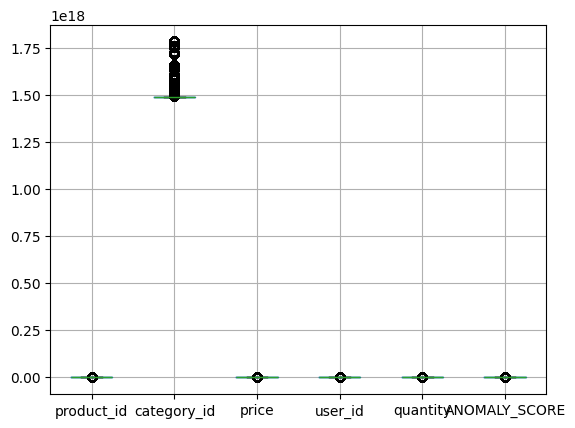

In [39]:
DATA_WINSOR.boxplot()


---
### üéØ **TRANSFORMATION**
### üîÑ **TRANSFORMATION MAGIC!**

‚ú® *"Don't erase the extremes ‚Äî reshape them!"* ‚ú®

Apply transformations to **reduce the influence** of outliers
and make your data **smoother & smarter** üìä

---

### üßÆ **Common Transformations**:

üìâ **Log Transformation**

üîπ *"Compresses large values"*

üîπ Great for **skewed data**


üî¢ **Box-Cox Transformation**

üîπ *"Turns chaos into normal!"*

üîπ Makes data **more normally distributed**

üîπ Only for **positive values**


üßÆ **Square Root Transformation**

üîπ *"Tames the extremes gently"*

üîπ Works well when data has **moderate skew**

---


In [40]:
DATA_FOR_logTRANSFORMATION=DATA.copy()

In [42]:
DATA_FOR_logTRANSFORMATION["category_id"]=np.log1p(DATA_FOR_logTRANSFORMATION["category_id"])

<Axes: >

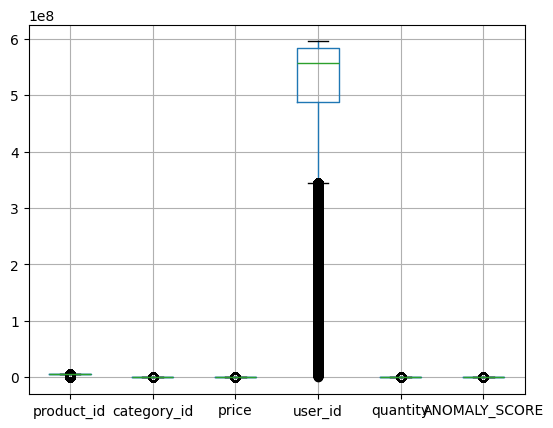

In [43]:
DATA_FOR_logTRANSFORMATION.boxplot()

In [44]:
DATA_FOR_boxcoxTRANSFORMATION=DATA.copy()

In [45]:
from scipy.stats import boxcox
# Apply Box-Cox
DATA_FOR_boxcoxTRANSFORMATION['category_id'], lambda_val = boxcox(DATA_FOR_boxcoxTRANSFORMATION['category_id'])

<Axes: >

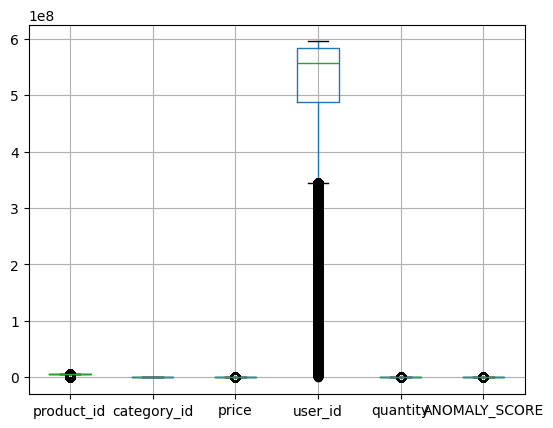

In [46]:
DATA_FOR_boxcoxTRANSFORMATION.boxplot()


---

## üîπ **Univariate Outlier Treatment**

üëâ Focuses on **one column at a time**

### ‚úÖ Methods:

* **Z-Score** ‚Äì Outliers beyond ¬±3 std dev
* **IQR** ‚Äì Values outside Q1‚Äì1.5√óIQR or Q3+1.5√óIQR
* **Winsorization** ‚Äì Cap extreme values
* **Transformation** ‚Äì Log, Box-Cox, ‚àö to reduce outlier impact
* **Imputation** ‚Äì Replace outliers with mean/median

üß∞ **Use when**: Features are **independent**

---

## üî∏ **Multivariate Outlier Treatment**

üëâ Looks at **all columns together**

### ‚úÖ Methods:

* **Isolation Forest** ‚Äì Detects rows needing fewer splits
* **Elliptic Envelope** ‚Äì Detects elliptical data outliers
* **One-Class SVM** ‚Äì Learns normal boundary
* **dbscan** ‚Äì Detects based on local density
* **Mahalanobis Distance** ‚Äì Measures distance from multivariate mean

üß∞ **Use when**: Features are **related**

---

üß† **Key Difference**:

* **Univariate** = Detect column-wise üìà
* **Multivariate** = Detect row-wise üîç
